In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(FD_RES, "results", "CRISPRi_Growth_K562_Gersbach", "coverage_astarrseq_peak_macs_input")
dir(fdiry)

[1] "CRISPRi_rAVG_log2FC_2.bed.gz"

In [3]:
fdiry = file.path(FD_RES, "results", "CRISPRi_Growth_K562_Gersbach", "coverage_astarrseq_peak_macs_input")
fname = "CRISPRi_rAVG_log2FC_2.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score")
cnames = c("Chrom_Peak", "Start_Peak", "End_Peak", cnames, "Overlap")

dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Peak = paste0(Chrom_Peak, ":", Start_Peak, "-", End_Peak))

dat_peak_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 824575     10


Chrom_Peak,Start_Peak,End_Peak,Chrom,Start,End,Name,Score,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr1,605090,605823,chr1,605580,605581,id-1,-0.180660,1,chr1:605090-605823
chr1,605090,605823,chr1,605581,605582,id-2,0.486646,1,chr1:605090-605823
chr1,605090,605823,chr1,605589,605590,id-3,3.171240,1,chr1:605090-605823
chr1,605090,605823,chr1,605591,605592,id-4,-0.364573,1,chr1:605090-605823
chr1,605090,605823,chr1,605592,605593,id-5,-0.206319,1,chr1:605090-605823
chr1,605090,605823,chr1,605609,605610,id-6,-0.266750,1,chr1:605090-605823


In [4]:
dat = dat_peak_crispri_growth
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        Score_Mean    = mean(Score),
        Score_Max     = max(Score),
        Score_Min     = min(Score),
        Score_Max_Abs = max(abs(Score)),
        Count         = n()
    )

dat_peak_summary_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 80288     6


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100009096-100010466,-0.03786170,0.526902,-0.655965,0.655965,10
chr10:100045961-100046653,0.10873570,0.646953,-0.497578,0.646953,10
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,10
chr10:100129051-100131059,-0.26576144,0.253159,-0.767330,0.767330,9
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,25
chr10:100228452-100230090,-0.01822050,0.446912,-0.768059,0.768059,10


In [5]:
dat = dat_peak_summary_crispri_growth
vec = dat$Count
summary(vec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   10.00   10.27   10.00   69.00 

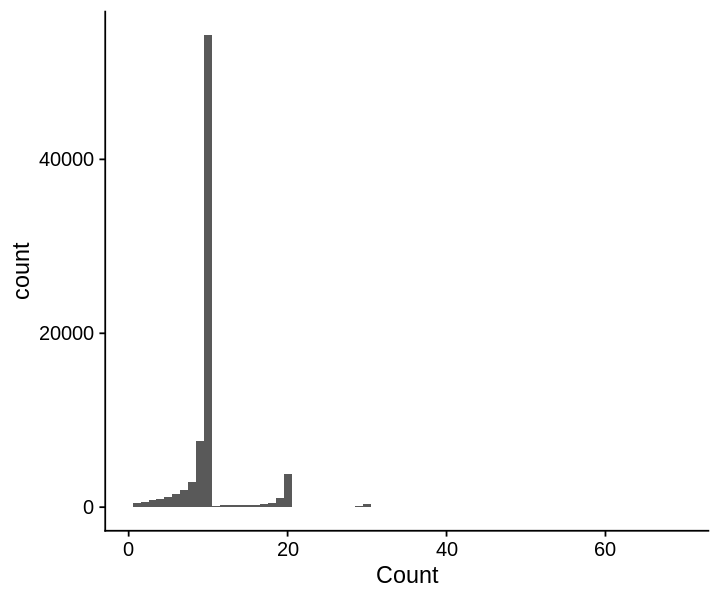

In [6]:
dat = dat_peak_summary_crispri_growth
gpt = ggplot(dat, aes(x=Count)) + geom_histogram(binwidth = 1) + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 23 rows containing missing values (`geom_bar()`).”


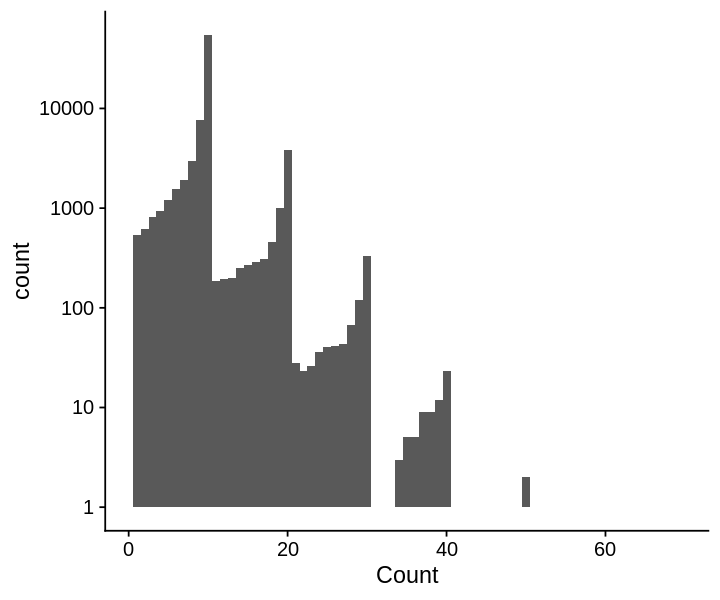

In [7]:
dat = dat_peak_summary_crispri_growth
gpt = ggplot(dat, aes(x=Count)) + geom_histogram(binwidth = 1) + scale_y_log10() + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

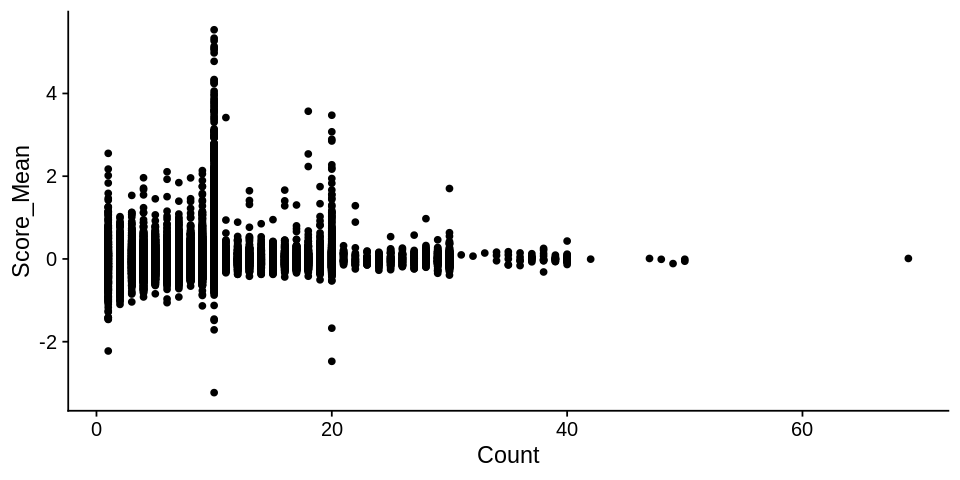

In [8]:
dat = dat_peak_summary_crispri_growth
gpt = ggplot(dat, aes(x=Count, y=Score_Mean)) + geom_point() + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=8)
print(gpt)

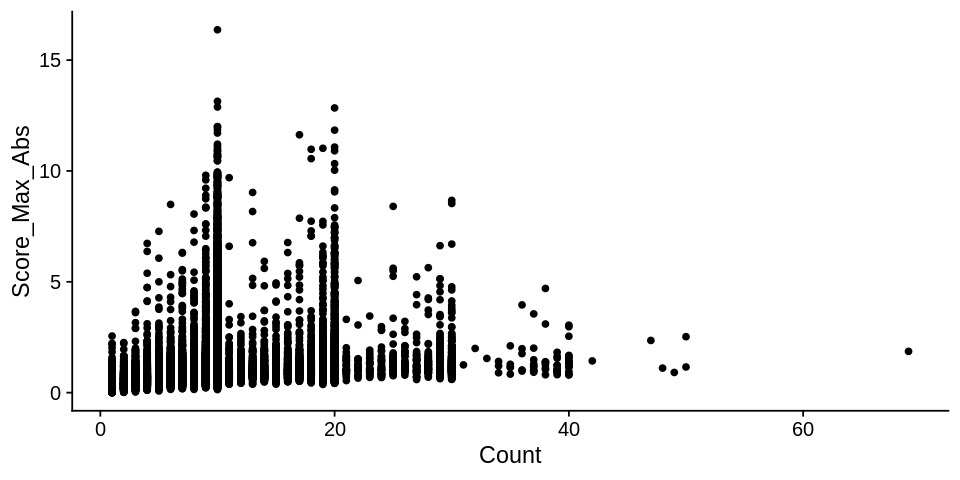

In [9]:
dat = dat_peak_summary_crispri_growth
gpt = ggplot(dat, aes(x=Count, y=Score_Max_Abs)) + geom_point() + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=8)
print(gpt)

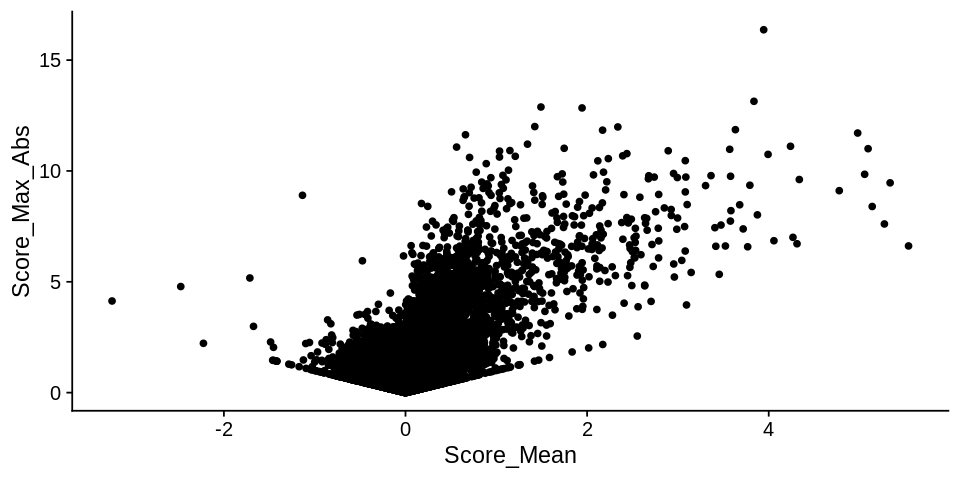

In [10]:
dat = dat_peak_summary_crispri_growth
gpt = ggplot(dat, aes(x=Score_Mean, y=Score_Max_Abs)) + geom_point() + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=8)
print(gpt)

## Test the idea of filteration

In [11]:
dat = dat_peak_summary_crispri_growth
val_count_peak_total = nrow(dat)

dat = dat %>% dplyr::filter(Count >= 5)
val_count_peak_filter = nrow(dat)

val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))
head(dat)

[1] "77378 / 80288 = 96.3755480271024 %"


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100009096-100010466,-0.03786170,0.526902,-0.655965,0.655965,10
chr10:100045961-100046653,0.10873570,0.646953,-0.497578,0.646953,10
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,10
chr10:100129051-100131059,-0.26576144,0.253159,-0.767330,0.767330,9
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,25
chr10:100228452-100230090,-0.01822050,0.446912,-0.768059,0.768059,10


In [12]:
dat = dat_peak_summary_crispri_growth
val_count_peak_total = nrow(dat)

dat = dat %>% dplyr::filter(Count >= 10)
val_count_peak_filter = nrow(dat)

val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))
head(dat)

[1] "62120 / 80288 = 77.371462734157 %"


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100009096-100010466,-0.03786170,0.526902,-0.655965,0.655965,10
chr10:100045961-100046653,0.10873570,0.646953,-0.497578,0.646953,10
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,10
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,25
chr10:100228452-100230090,-0.01822050,0.446912,-0.768059,0.768059,10
chr10:100240591-100241246,-0.00780470,0.892650,-0.570208,0.892650,10


In [13]:
dat = dat_peak_summary_crispri_growth
val_count_peak_total = nrow(dat)
val_sd = 0.5713106

dat = dat %>% dplyr::filter(Count >= 5) %>% dplyr::filter(Score_Max_Abs >= val_sd * 1)
val_count_peak_filter = nrow(dat)

val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))
head(dat)

[1] "70457 / 80288 = 87.7553308090873 %"


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100009096-100010466,-0.03786170,0.526902,-0.655965,0.655965,10
chr10:100045961-100046653,0.10873570,0.646953,-0.497578,0.646953,10
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,10
chr10:100129051-100131059,-0.26576144,0.253159,-0.767330,0.767330,9
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,25
chr10:100228452-100230090,-0.01822050,0.446912,-0.768059,0.768059,10


In [14]:
dat = dat_peak_summary_crispri_growth
val_count_peak_total = nrow(dat)
val_sd = 0.5713106

dat = dat %>% dplyr::filter(Count >= 5) %>% dplyr::filter(Score_Max_Abs >= val_sd * 1.5)
val_count_peak_filter = nrow(dat)

val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))
head(dat)

[1] "45695 / 80288 = 56.9138601036269 %"


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,10
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,25
chr10:100240591-100241246,-0.00780470,0.892650,-0.570208,0.892650,10
chr10:100267066-100268374,0.25902410,2.091760,-0.823935,2.091760,10
chr10:100289686-100290090,0.05728600,0.961458,-0.710980,0.961458,10
chr10:100325166-100325596,0.02724390,0.597514,-0.883929,0.883929,10


In [15]:
dat = dat_peak_summary_crispri_growth
val_count_peak_total = nrow(dat)
val_sd = 0.5713106

dat = dat %>% dplyr::filter(Count >= 5) %>% dplyr::filter(Score_Max_Abs >= val_sd * 2)
val_count_peak_filter = nrow(dat)

val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))
head(dat)

[1] "22041 / 80288 = 27.4524212833798 %"


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100065094-100065486,-0.0032373,1.30538,-0.677550,1.30538,10
chr10:100267066-100268374,0.2590241,2.09176,-0.823935,2.09176,10
chr10:100346328-100347693,1.4925327,6.29504,-0.070348,6.29504,10
chr10:100358645-100359733,1.7914824,6.14112,-0.744532,6.14112,10
chr10:100370571-100371646,0.6905307,1.97055,-0.259636,1.97055,20
chr10:100373060-100374238,1.2942563,2.91255,-0.966814,2.91255,10


In [16]:
get_max_1st = function(x){
    sort(x, decreasing = TRUE)[1]
}
get_max_2nd = function(x){
    sort(x, decreasing = TRUE)[2]
}

get_min_1st = function(x){
    sort(x, decreasing = FALSE)[1]
}
get_min_2nd = function(x){
    sort(x, decreasing = FALSE)[2]
}

In [17]:
x = c(1, 2, 3, -1, -2, 5)
print(get_max_1st(x))
print(get_max_2nd(x))
print(get_min_1st(x))
print(get_min_2nd(x))

[1] 5
[1] 3
[1] -2
[1] -1


In [18]:
dat = dat_peak_crispri_growth
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        Score_Mean    = mean(Score),
        Score_Max     = max(Score),
        Score_Min     = min(Score),
        Score_Max_Abs = max(abs(Score)),
        Score_Max_1 = get_max_1st(Score),
        Score_Max_2 = get_max_2nd(Score),
        Score_Min_1 = get_min_1st(Score),
        Score_Min_2 = get_min_2nd(Score),
        Count       = n()
    )

dat_peak_summary_crispri_growth_v2 = dat
print(dim(dat))
head(dat)

[1] 80288    10


Peak,Score_Mean,Score_Max,Score_Min,Score_Max_Abs,Score_Max_1,Score_Max_2,Score_Min_1,Score_Min_2,Count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10:100009096-100010466,-0.03786170,0.526902,-0.655965,0.655965,0.526902,0.484747,-0.655965,-0.609279,10
chr10:100045961-100046653,0.10873570,0.646953,-0.497578,0.646953,0.646953,0.568021,-0.497578,-0.212699,10
chr10:100065094-100065486,-0.00323730,1.305380,-0.677550,1.305380,1.305380,0.485304,-0.677550,-0.572938,10
chr10:100129051-100131059,-0.26576144,0.253159,-0.767330,0.767330,0.253159,0.059893,-0.767330,-0.671687,9
chr10:100185017-100187275,-0.01202196,0.730481,-0.954435,0.954435,0.730481,0.684225,-0.954435,-0.518497,25
chr10:100228452-100230090,-0.01822050,0.446912,-0.768059,0.768059,0.446912,0.236027,-0.768059,-0.334032,10


In [31]:
dat = dat_peak_summary_crispri_growth_v2
val_count_peak_total = nrow(dat)
val_sd = 0.5713106
print(val_count_peak_total)

dat = dat %>% dplyr::filter(Count >= 5)
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat1 = dat %>% 
    dplyr::filter(
        Score_Max_1 >= val_sd, 
        Score_Max_2 >= val_sd
    )
dat2 = dat %>% 
    dplyr::filter(
        abs(Score_Min_1) >= val_sd, 
        abs(Score_Min_2) >= val_sd
    )

dat = bind_rows(dat1, dat2) %>% dplyr::distinct()
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat_peak_filter_two_guide_1std = dat
val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))

[1] 80288
[1] 77378
[1] 43369
[1] "43369 / 80288 = 54.0167895575927 %"


In [32]:
dat = dat_peak_summary_crispri_growth_v2
val_count_peak_total = nrow(dat)
val_sd = 0.5713106
print(val_count_peak_total)

dat = dat %>% dplyr::filter(Count >= 5)
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat = dat %>% dplyr::filter(Score_Max_Abs >= val_sd*2)
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat_peak_filter_one_guide_2std = dat
val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))

[1] 80288
[1] 77378
[1] 22041
[1] "22041 / 80288 = 27.4524212833798 %"


In [41]:
dat = dat_peak_summary_crispri_growth_v2
val_count_peak_total = nrow(dat)
val_sd = 0.5713106
print(val_count_peak_total)

dat = dat %>% dplyr::filter(Count >= 5)
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat = dat %>% dplyr::filter(Score_Max_Abs >= val_sd*3)
val_count_peak_filter = nrow(dat)
print(val_count_peak_filter)

dat_peak_filter_one_guide_3std = dat
val1 = val_count_peak_filter
val2 = val_count_peak_total
print(paste(val1, "/", val2, "=", val1 / val2 * 100, "%"))

[1] 80288
[1] 77378
[1] 5353
[1] "5353 / 80288 = 6.66724790753288 %"


In [38]:
dat = dat_peak_filter_two_guide_1std %>% 
    dplyr::select(Peak) %>% 
    tidyr::separate(Peak, c("Chrom", "Start", "End")) %>%
    dplyr::arrange(Chrom, Start, End)
head(dat)

Chrom,Start,End
<chr>,<chr>,<chr>
chr1,100132370,100133575
chr1,100213080,100213553
chr1,100248889,100250320
chr1,100265529,100267006
chr1,100325360,100326339
chr1,100347294,100347528


In [39]:
fdiry = file.path(FD_RES, "results", "region", "annotation_crispri_growth")
fname = "crispri_growth_ocr_two_guide_1std.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_peak_filter_two_guide_1std
dat = dat %>% 
    dplyr::select(Peak) %>% 
    tidyr::separate(Peak, c("Chrom", "Start", "End")) %>%
    dplyr::arrange(Chrom, Start, End)

write_tsv(dat, fpath, col_names=FALSE)

In [40]:
fdiry = file.path(FD_RES, "results", "region", "annotation_crispri_growth")
fname = "crispri_growth_ocr_one_guide_2std.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_peak_filter_one_guide_2std
dat = dat %>% 
    dplyr::select(Peak) %>% 
    tidyr::separate(Peak, c("Chrom", "Start", "End")) %>%
    dplyr::arrange(Chrom, Start, End)

write_tsv(dat, fpath, col_names=FALSE)

In [42]:
fdiry = file.path(FD_RES, "results", "region", "annotation_crispri_growth")
fname = "crispri_growth_ocr_one_guide_3std.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_peak_filter_one_guide_3std
dat = dat %>% 
    dplyr::select(Peak) %>% 
    tidyr::separate(Peak, c("Chrom", "Start", "End")) %>%
    dplyr::arrange(Chrom, Start, End)

write_tsv(dat, fpath, col_names=FALSE)